In [4]:
import pandas as pd
import numpy as np
import pylab
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis

In [5]:
dataset = pd.read_csv('wdbc_data.csv')
dataset = dataset.drop(['id'], axis = 1)
dataset.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
dataset.sample(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
378,0,13.660,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,...,14.540,19.64,97.96,657.0,0.1275,0.31040,0.25690,0.10540,0.3387,0.09638
314,0,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,...,8.952,22.44,56.65,240.1,0.1347,0.07767,0.00000,0.00000,0.3142,0.08116
158,0,12.060,12.74,76.84,448.6,0.09311,0.05241,0.01972,0.01963,0.1590,...,13.140,18.41,84.08,532.8,0.1275,0.12320,0.08636,0.07025,0.2514,0.07898
48,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.02749,0.1675,...,13.760,20.70,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301
541,0,14.470,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,...,16.220,31.73,113.50,808.9,0.1340,0.42020,0.40400,0.12050,0.3187,0.10230
60,0,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,...,11.020,17.45,69.86,368.6,0.1275,0.09866,0.02168,0.02579,0.3557,0.08020
265,1,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.08646,0.1769,...,32.490,47.16,214.00,3432.0,0.1401,0.26440,0.34420,0.16590,0.2868,0.08218
399,0,11.800,17.26,75.26,431.9,0.09087,0.06232,0.02853,0.01638,0.1847,...,13.450,24.49,86.00,562.0,0.1244,0.17260,0.14490,0.05356,0.2779,0.08121
108,1,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.18230,0.2556,...,28.400,28.01,206.80,2360.0,0.1701,0.69970,0.96080,0.29100,0.4055,0.09789
233,1,20.510,27.81,134.40,1319.0,0.09159,0.10740,0.15540,0.08340,0.1448,...,24.470,37.38,162.70,1872.0,0.1223,0.27610,0.41460,0.15630,0.2437,0.08328


In [6]:
features = list(dataset.columns[1:])
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [8]:
from sklearn.decomposition import PCA

def apply_pca(X, n , add_constant = False):
    
    pca = PCA(n_components = n)
    x_new = pca.fit_transform(X)
    
    if add_constant is True:
        x_new = sm.add_constant(x_new)
    
    return pca, pd.DataFrame(x_new)

In [9]:
pca, _ = apply_pca(dataset[features], len(features))

In [10]:
print("Explained Variance: ", pca.explained_variance_ratio_)

Explained Variance:  [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07 6.99473205e-08 1.65908880e-08
 6.99641650e-09 4.78318306e-09 2.93549214e-09 1.41684927e-09
 8.29577731e-10 5.20405883e-10 4.08463983e-10 3.63313378e-10
 1.72849737e-10 1.27487508e-10 7.72682973e-11 6.28357718e-11
 3.57302295e-11 2.76396041e-11 8.14452259e-12 6.30211541e-12
 4.43666945e-12 1.55344680e-12]


Text(0, 0.5, 'Cumulative Variance')

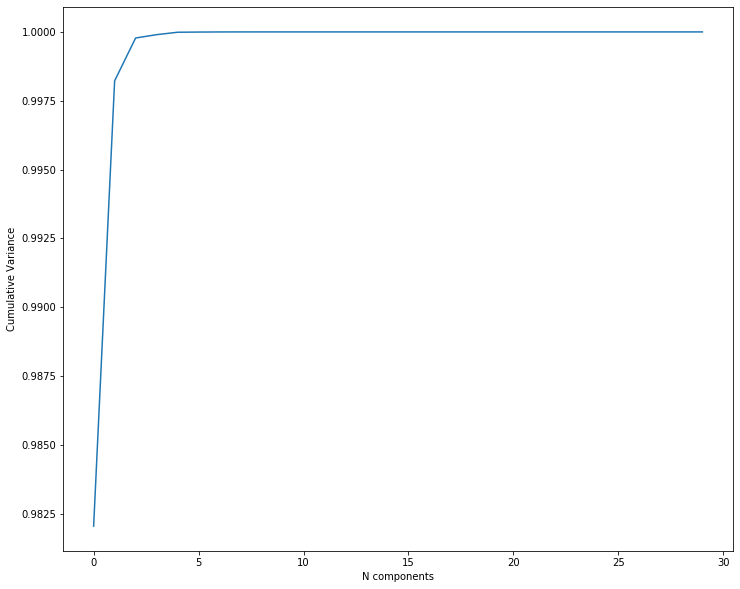

In [11]:
plt.figure(figsize = (12, 10))

plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('N components')
plt.ylabel('Cumulative Variance')

In [18]:
def build_model(classifier_fn,
               name_of_y_col,
               names_of_X_cols,
               dataset,
               *hyperparameters):
    
    X = dataset[names_of_X_cols]
    Y = dataset[name_of_y_col]
    
    _ , X_new = apply_pca(X, *hyperparameters) 
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)
    
    model = classifier_fn(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    pred_results = pd.DataFrame({'y_test': y_test,
                                'y_pred': y_pred})
    
    model_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
    
    acc = accuracy_score(y_test, y_pred)
    pre = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)
    F1score = f1_score(y_test, y_pred)
    
    return{'transform_x': X_new,
           'Accuracy': acc,
           'Precision': pre,
           'Recall': rec,
           'ROC': roc,
           'F1 Score': F1score,
           'Confusion Matrix': model_crosstab
          }

In [19]:
def compare_results(result_dict):
    
    for key in result_dict:
        print('Test', key)
        print()
        print("Accuracy Score:", result_dict[key]['Accuracy'])
        print("Precision Score:", result_dict[key]['Precision'])
        print("Recall Score:", result_dict[key]['Recall'])
        print("F1 score:", result_dict[key]['F1 Score'])
        print("ROC:", result_dict[key]['ROC'])
        print()

In [20]:
def visualize_results(result_dict):
    
    n_components = list(range(0, 30))
    acc = [result_dict[key]['Accuracy'] for key in result_dict]
    pre = [result_dict[key]['Precision'] for key in result_dict]
    rec = [result_dict[key]['Recall'] for key in result_dict]
    
    plt.figure(figsize = (12, 10))
    plt.plot(n_components, acc, label = 'Accuracy')
    plt.plot(n_components, pre, label = 'Precision')
    plt.plot(n_components, rec, label = 'Recall')
    
    pylab.ylim([0.7, 1.2])
    
    plt.xlabel('n_components')
    plt.ylabel('Score')
    
    plt.legend()

In [21]:
def logistic_fn(x_train, y_train):
    model = LogisticRegression(solver = 'liblinear')
    model.fit(x_train, y_train)
    
    return model

In [22]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(logistic_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [23]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9532163742690059
Precision Score: 0.9649122807017544
Recall Score: 0.9016393442622951
F1 score: 0.9322033898305084
ROC: 0.9417287630402384

Test n_components - 2

Accuracy Score: 0.9473684210526315
Precision Score: 0.9272727272727272
Recall Score: 0.9107142857142857
F1 score: 0.918918918918919
ROC: 0.9379658385093167

Test n_components - 3

Accuracy Score: 0.9532163742690059
Precision Score: 0.9436619718309859
Recall Score: 0.9436619718309859
F1 score: 0.9436619718309859
ROC: 0.9518309859154929

Test n_components - 4

Accuracy Score: 0.9590643274853801
Precision Score: 0.95
Recall Score: 0.9344262295081968
F1 score: 0.9421487603305784
ROC: 0.9535767511177348

Test n_components - 5

Accuracy Score: 0.9239766081871345
Precision Score: 0.8771929824561403
Recall Score: 0.8928571428571429
F1 score: 0.8849557522123894
ROC: 0.9159937888198758

Test n_components - 6

Accuracy Score: 0.935672514619883
Precision Score: 0.92
Recall Score: 0.867924528301886

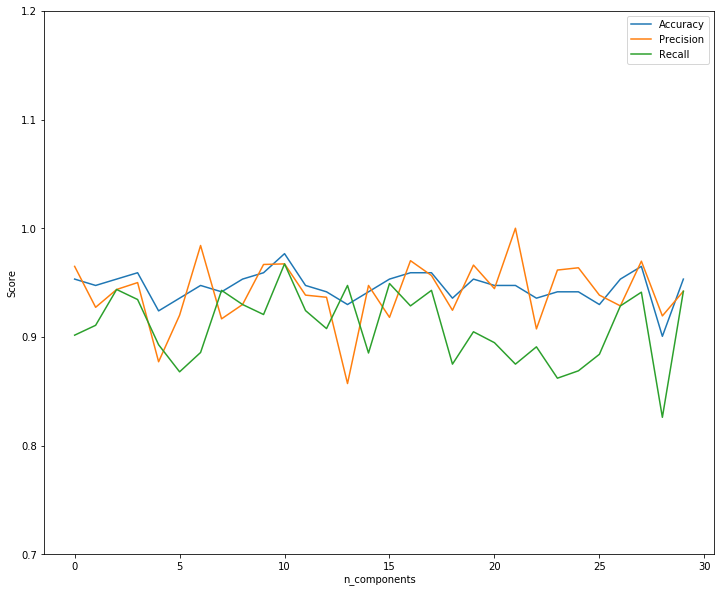

In [24]:
visualize_results(result_dict)

In [25]:
def rfc_fn(X_train, y_train):
    model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
    model.fit(X_train, y_train)
        
    return model

In [26]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(rfc_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [27]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9473684210526315
Precision Score: 0.8985507246376812
Recall Score: 0.96875
F1 score: 0.9323308270676692
ROC: 0.9516647196261682

Test n_components - 2

Accuracy Score: 0.9298245614035088
Precision Score: 0.9827586206896551
Recall Score: 0.8382352941176471
F1 score: 0.9047619047619048
ROC: 0.9142632781267848

Test n_components - 3

Accuracy Score: 0.9649122807017544
Precision Score: 0.9692307692307692
Recall Score: 0.9402985074626866
F1 score: 0.9545454545454547
ROC: 0.9605338691159587

Test n_components - 4

Accuracy Score: 0.9707602339181286
Precision Score: 0.96875
Recall Score: 0.9538461538461539
F1 score: 0.9612403100775193
ROC: 0.9674891146589261

Test n_components - 5

Accuracy Score: 0.9473684210526315
Precision Score: 0.953125
Recall Score: 0.9104477611940298
F1 score: 0.931297709923664
ROC: 0.9408008036739379

Test n_components - 6

Accuracy Score: 0.935672514619883
Precision Score: 0.9117647058823529
Recall Score: 0.9253731343283582
F1

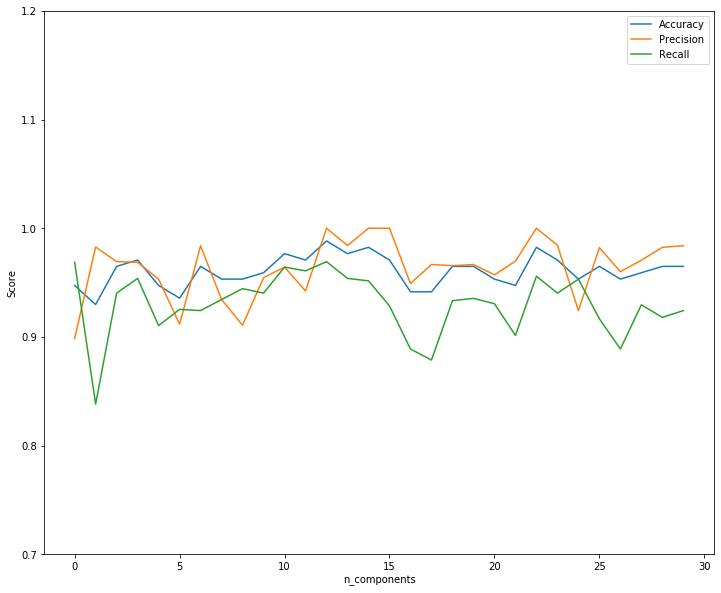

In [28]:
visualize_results(result_dict)

In [29]:
def stochastic_gradient_descent_fn(x_train, y_train, max_iter=10000, tol=1e-3):
    
    model = SGDClassifier(max_iter=max_iter, tol=tol)
    model.fit(x_train, y_train)
    
    return model

In [30]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(stochastic_gradient_descent_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [31]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.8654970760233918
Precision Score: 0.975
Recall Score: 0.639344262295082
F1 score: 0.7722772277227722
ROC: 0.8151266766020865

Test n_components - 2

Accuracy Score: 0.5029239766081871
Precision Score: 0.4097222222222222
Recall Score: 1.0
F1 score: 0.5812807881773399
ROC: 0.6205357142857143

Test n_components - 3

Accuracy Score: 0.9005847953216374
Precision Score: 0.98
Recall Score: 0.7538461538461538
F1 score: 0.8521739130434782
ROC: 0.8722060957910015

Test n_components - 4

Accuracy Score: 0.847953216374269
Precision Score: 0.9743589743589743
Recall Score: 0.6031746031746031
F1 score: 0.7450980392156863
ROC: 0.796957671957672

Test n_components - 5

Accuracy Score: 0.9064327485380117
Precision Score: 0.8428571428571429
Recall Score: 0.921875
F1 score: 0.880597014925373
ROC: 0.9095356308411215

Test n_components - 6

Accuracy Score: 0.9064327485380117
Precision Score: 0.8636363636363636
Recall Score: 0.890625
F1 score: 0.8769230769230768
ROC: 

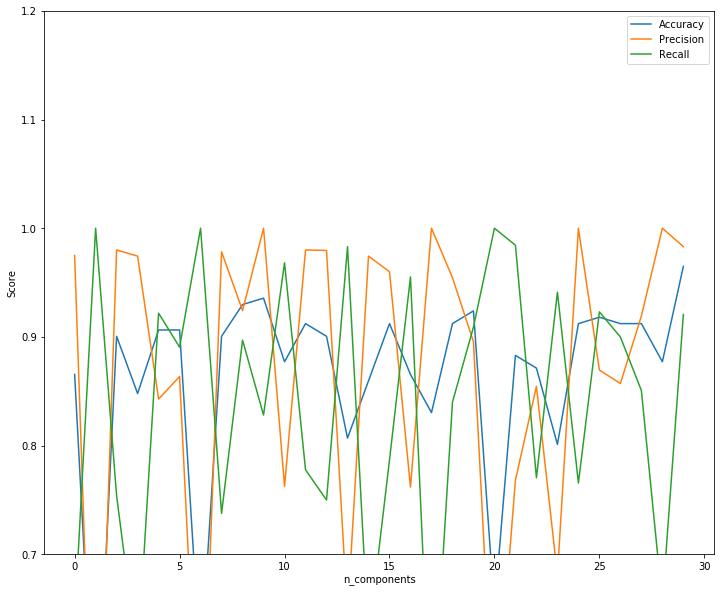

In [32]:
visualize_results(result_dict)

In [33]:
def svm_fn(x_train, y_train):
    model = SVC(kernel = 'linear')
    model.fit(x_train, y_train)
    
    return model

In [34]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(svm_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)


In [35]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9707602339181286
Precision Score: 0.9629629629629629
Recall Score: 0.9454545454545454
F1 score: 0.9541284403669724
ROC: 0.9641065830721002

Test n_components - 2

Accuracy Score: 0.9415204678362573
Precision Score: 0.9538461538461539
Recall Score: 0.8985507246376812
F1 score: 0.9253731343283582
ROC: 0.9345694799658993

Test n_components - 3

Accuracy Score: 0.9532163742690059
Precision Score: 0.9545454545454546
Recall Score: 0.9264705882352942
F1 score: 0.9402985074626866
ROC: 0.9486721873215306

Test n_components - 4

Accuracy Score: 0.9532163742690059
Precision Score: 0.9666666666666667
Recall Score: 0.90625
F1 score: 0.9354838709677419
ROC: 0.9437792056074766

Test n_components - 5

Accuracy Score: 0.9766081871345029
Precision Score: 0.967741935483871
Recall Score: 0.967741935483871
F1 score: 0.967741935483871
ROC: 0.9746966558153299

Test n_components - 6

Accuracy Score: 0.9766081871345029
Precision Score: 0.967741935483871
Recall Score: 0.

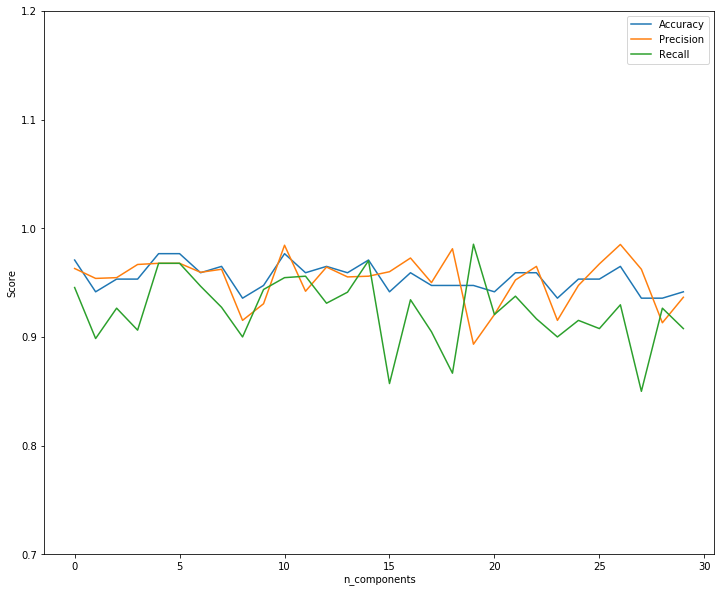

In [36]:
visualize_results(result_dict)

In [37]:
def KNN_fn(x_train, y_train):
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    
    return model

In [38]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(KNN_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [39]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.935672514619883
Precision Score: 0.971830985915493
Recall Score: 0.8846153846153846
F1 score: 0.9261744966442953
ROC: 0.9315550041356493

Test n_components - 2

Accuracy Score: 0.9415204678362573
Precision Score: 0.9032258064516129
Recall Score: 0.9333333333333333
F1 score: 0.9180327868852459
ROC: 0.9396396396396396

Test n_components - 3

Accuracy Score: 0.9649122807017544
Precision Score: 0.9491525423728814
Recall Score: 0.9491525423728814
F1 score: 0.9491525423728814
ROC: 0.9611834140435835

Test n_components - 4

Accuracy Score: 0.935672514619883
Precision Score: 0.9622641509433962
Recall Score: 0.85
F1 score: 0.9026548672566371
ROC: 0.915990990990991

Test n_components - 5

Accuracy Score: 0.9122807017543859
Precision Score: 0.9056603773584906
Recall Score: 0.8275862068965517
F1 score: 0.8648648648648648
ROC: 0.8916692096429661

Test n_components - 6

Accuracy Score: 0.9532163742690059
Precision Score: 0.9682539682539683
Recall Score: 0.910

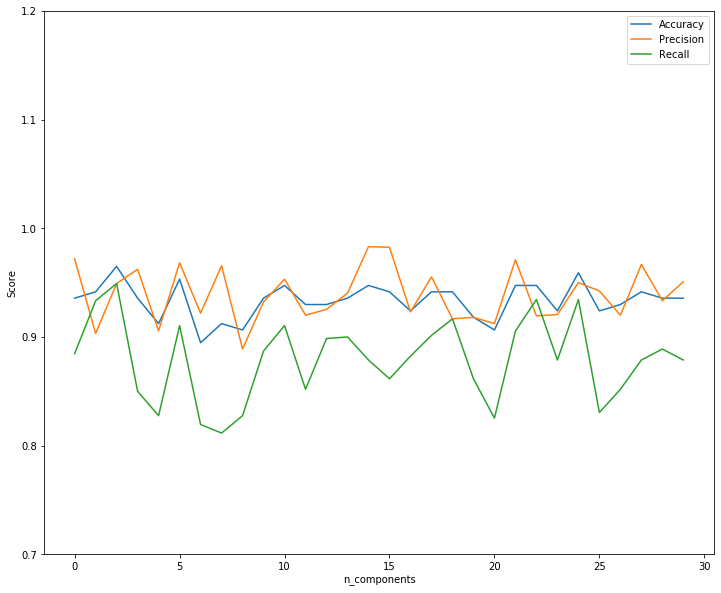

In [40]:
visualize_results(result_dict)

In [41]:
def DTC_fn(x_train, y_train):
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    
    return model

In [42]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(DTC_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [43]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9415204678362573
Precision Score: 0.9016393442622951
Recall Score: 0.9322033898305084
F1 score: 0.9166666666666666
ROC: 0.9393159806295399

Test n_components - 2

Accuracy Score: 0.9298245614035088
Precision Score: 0.9295774647887324
Recall Score: 0.9041095890410958
F1 score: 0.9166666666666666
ROC: 0.9265445904389155

Test n_components - 3

Accuracy Score: 0.9473684210526315
Precision Score: 0.8857142857142857
Recall Score: 0.9841269841269841
F1 score: 0.9323308270676691
ROC: 0.955026455026455

Test n_components - 4

Accuracy Score: 0.9239766081871345
Precision Score: 0.9122807017543859
Recall Score: 0.8666666666666667
F1 score: 0.8888888888888888
ROC: 0.9108108108108108

Test n_components - 5

Accuracy Score: 0.9298245614035088
Precision Score: 0.859375
Recall Score: 0.9482758620689655
F1 score: 0.9016393442622951
ROC: 0.9343149221849253

Test n_components - 6

Accuracy Score: 0.9298245614035088
Precision Score: 0.8709677419354839
Recall Score

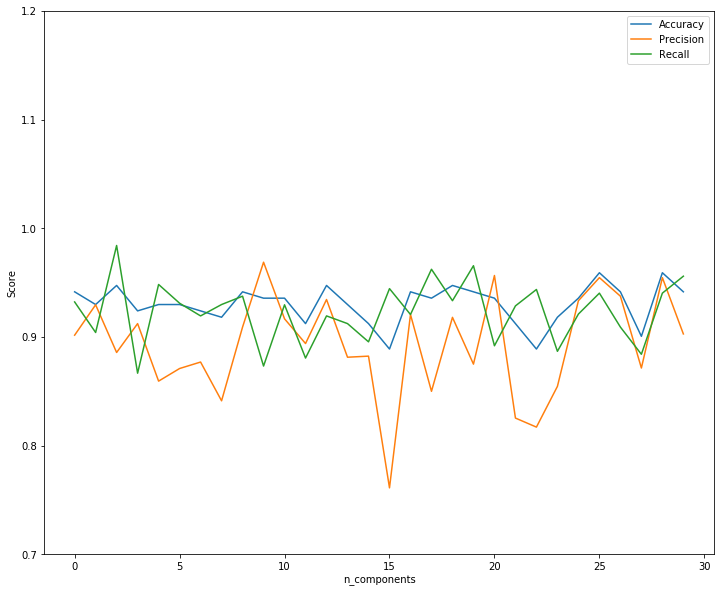

In [44]:
visualize_results(result_dict)

In [45]:
def GNB_fn(x_train, y_train):
    model = GaussianNB()
    model.fit(x_train, y_train)
    
    return model


In [46]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(GNB_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [47]:
compare_results(result_dict)

Test n_components - 1

Accuracy Score: 0.9415204678362573
Precision Score: 0.9571428571428572
Recall Score: 0.9054054054054054
F1 score: 0.9305555555555555
ROC: 0.9372387851769295

Test n_components - 2

Accuracy Score: 0.9415204678362573
Precision Score: 0.9411764705882353
Recall Score: 0.9142857142857143
F1 score: 0.9275362318840579
ROC: 0.9373408769448373

Test n_components - 3

Accuracy Score: 0.9473684210526315
Precision Score: 0.9444444444444444
Recall Score: 0.8947368421052632
F1 score: 0.918918918918919
ROC: 0.9342105263157896

Test n_components - 4

Accuracy Score: 0.9649122807017544
Precision Score: 0.9615384615384616
Recall Score: 0.9259259259259259
F1 score: 0.9433962264150944
ROC: 0.9544159544159544

Test n_components - 5

Accuracy Score: 0.9590643274853801
Precision Score: 0.9833333333333333
Recall Score: 0.9076923076923077
F1 score: 0.944
ROC: 0.9491291727140784

Test n_components - 6

Accuracy Score: 0.9122807017543859
Precision Score: 0.8840579710144928
Recall Score: 0

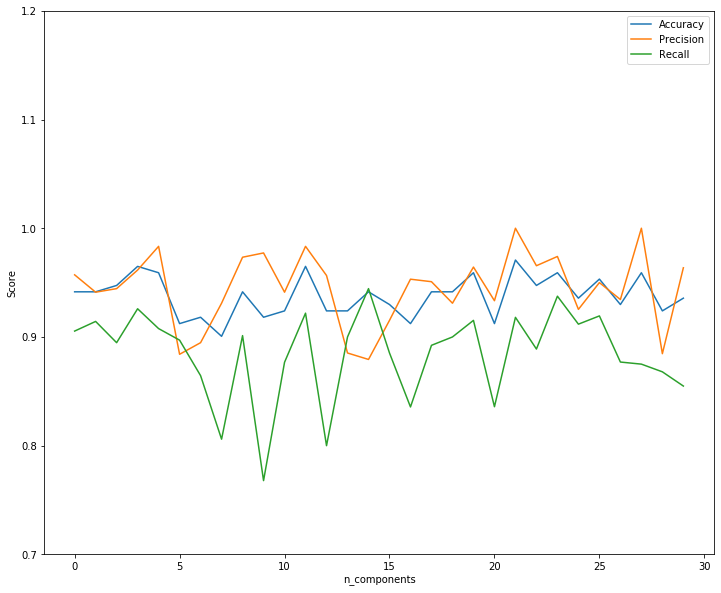

In [48]:
visualize_results(result_dict)

In [49]:
def ridge_fn(x_train, y_train):
    model = RidgeClassifier()
    model.fit(x_train, y_train)
    
    return model

In [50]:
result_dict = {}

for i in range(1, 31):
    result_dict['n_components - ' + str(i)] = build_model(ridge_fn,
                                                          'diagnosis',
                                                          features,
                                                          dataset,
                                                          i)

In [51]:
compare_results(result_dict)


Test n_components - 1

Accuracy Score: 0.9649122807017544
Precision Score: 0.9818181818181818
Recall Score: 0.9152542372881356
F1 score: 0.9473684210526316
ROC: 0.9531628329297821

Test n_components - 2

Accuracy Score: 0.9415204678362573
Precision Score: 0.9838709677419355
Recall Score: 0.8714285714285714
F1 score: 0.9242424242424242
ROC: 0.9307637906647808

Test n_components - 3

Accuracy Score: 0.9122807017543859
Precision Score: 1.0
Recall Score: 0.8076923076923077
F1 score: 0.8936170212765957
ROC: 0.9038461538461539

Test n_components - 4

Accuracy Score: 0.9473684210526315
Precision Score: 0.98
Recall Score: 0.8596491228070176
F1 score: 0.9158878504672898
ROC: 0.9254385964912281

Test n_components - 5

Accuracy Score: 0.9590643274853801
Precision Score: 1.0
Recall Score: 0.8923076923076924
F1 score: 0.9430894308943091
ROC: 0.9461538461538461

Test n_components - 6

Accuracy Score: 0.9649122807017544
Precision Score: 1.0
Recall Score: 0.9166666666666666
F1 score: 0.956521739130434

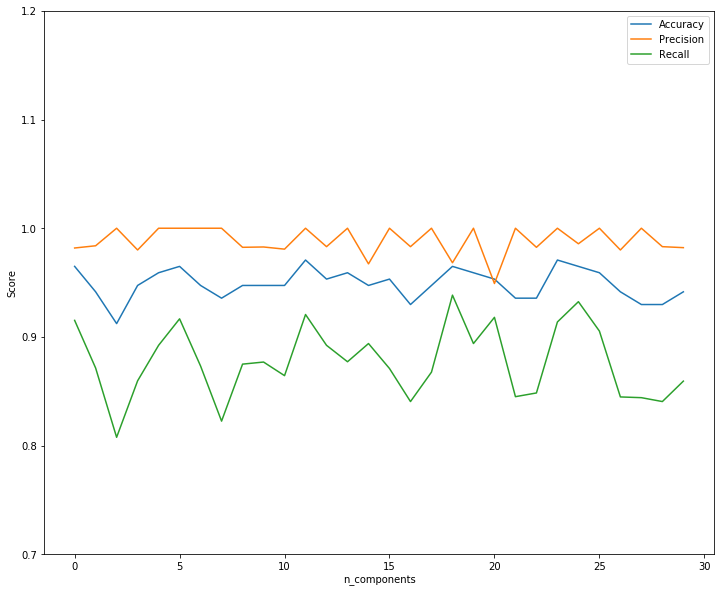

In [52]:
visualize_results(result_dict)